In [2]:
import os

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [4]:
import lib

In [5]:
os.environ["PATH"] += ":/global/common/software/nersc/pm-2023q2/sw/texlive/2022/bin/x86_64-linux"

In [6]:
shear_step = lib.const.SHEAR_STEPS[0]

In [7]:
truth_match_filename = "truth-match.hdf5"
truth_match_file = os.path.join(
    "/pscratch/sd/s/smau/y6-image-sims-matches",
    truth_match_filename,
)

truth_match_table = {}

with h5py.File(
    truth_match_file,
    mode="r",
) as hf:
    for k, v in hf.items():
        truth_match_table[k] = v[:]

In [6]:
wide_table = {}

with h5py.File(
    lib.const.IMSIM_CATALOGS[shear_step],
    mode="r",
) as hf:
    for k, v in hf["mdet"]["noshear"].items():
        wide_table[k] = v[:]

In [7]:
match_filename = f"match_{shear_step}.hdf5"
match_file = os.path.join(
    "/pscratch/sd/s/smau/y6-image-sims-matches",
    match_filename,
)

match_table = {}

with h5py.File(
    match_file,
    mode="r",
) as hf:
    for k, v in hf["mdet"].items():
        match_table[k] = v[:]

In [8]:
assert len(wide_table["uid"]) == len(match_table["uid"])

In [9]:
wide_table["uid"], match_table["uid"]

(array([     1516,      7341,      8034, ..., 611791305, 611792511,
        611794695], dtype='>i8'),
 array([  nan, 7341.,   nan, ...,   nan,   nan,   nan]))

In [10]:
np.intersect1d(
    wide_table["uid"][:],
    match_table["uid"][:],
    return_indices=True,
)

(array([   7341.,    8786.,    9307., ..., 3476861., 3477348., 3479095.]),
 array([    1,     3,     4, ..., 38493, 38494, 38495]),
 array([    1,     3,     4, ..., 38493, 38494, 38495]))

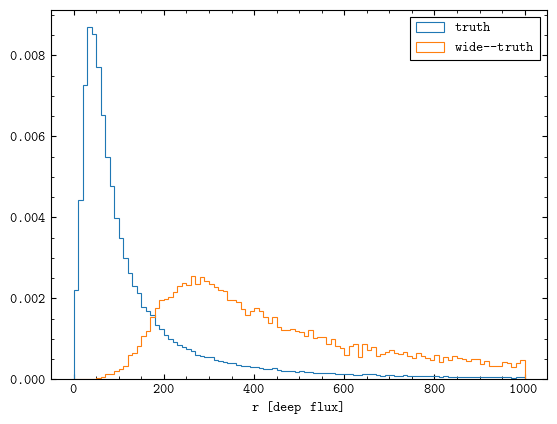

In [34]:
bins = np.linspace(0, 1000, 101)

plt.hist(
    truth_match_table["DEEP:flux_r"],
    bins=bins,
    histtype="step",
    label="truth",
    density=True,
)
plt.hist(
    match_table["DEEP:flux_r"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    density=True,
)

plt.xlabel("$r$ [deep flux]")
plt.legend()
plt.show()

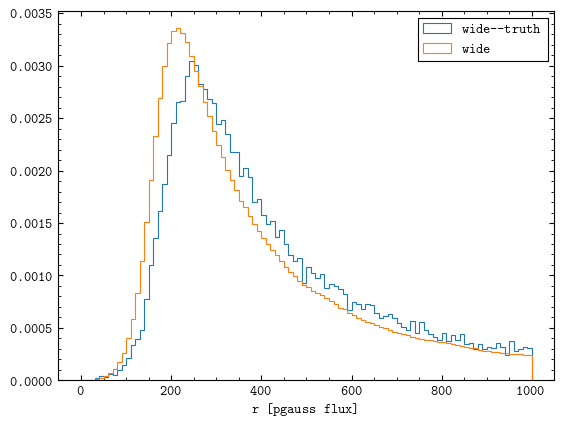

In [35]:
bins = np.linspace(0, 1000, 101)

plt.hist(
    match_table["WIDE:pgauss_flux_r"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    density=True,
)
plt.hist(
    wide_table["pgauss_band_flux_r"],
    bins=bins,
    histtype="step",
    label="wide",
    density=True,
)

plt.xlabel("$r$ [pgauss flux]")
plt.legend()
plt.show()

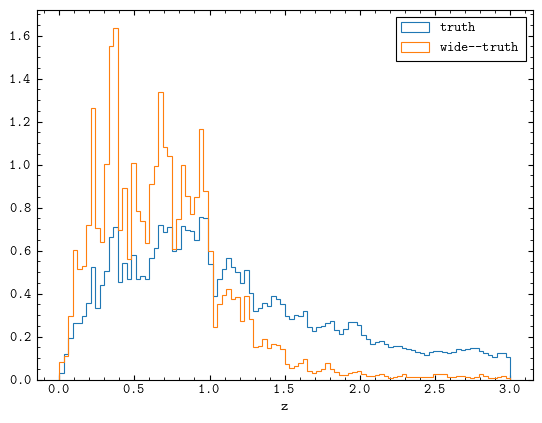

In [36]:
bins = np.linspace(0, 3, 101)

plt.hist(
    truth_match_table["z"],
    bins=bins,
    histtype="step",
    label="truth",
    density=True,
)
plt.hist(
    match_table["z"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    density=True,
)
plt.xlabel("$z$")
plt.legend()
plt.show()